# Basic Car Speed 

## Problem Statement

We would like to determine the speed of a car based on the bumpiness and slope of the road. For this, we have a list of the speed from a list of drivers.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/terrain.csv")

In [3]:
# Siempre se codifica así, "X" mayúscula e "y" minúscula
X = df[["bumpiness","grade"]].values
y = df["target"]

In [4]:
df.head()

,bumpiness,grade,target
0,0.639427,0.099355,0.0
1,0.025011,0.685680,0.0
2,0.275029,0.544466,0.0
3,0.223211,0.977843,1.0
4,0.736471,0.358674,1.0


In [5]:
X

array([[0.6394268 , 0.09935462],
       [0.02501076, 0.68568027],
       [0.27502932, 0.54446586],
       ...,
       [0.44338309, 0.6725319 ],
       [0.95055517, 0.32066512],
       [0.85545019, 0.30176444]])

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


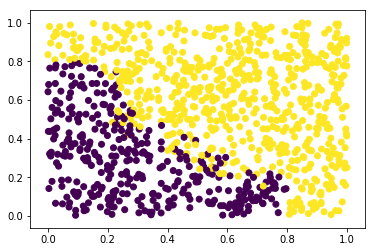

In [7]:
plt.scatter(df["bumpiness"], df["grade"], c=df["target"])

 K-nearest neighbors - KNN
 No interesa poner un número de vecinos que sea par. Mejor impar, de manera que haya un desempate

Es un algoritmo vago porque no asume nada de los datos del pasado. Cada vez que llega un dato nuevo, lo compara con todos los del pasado.

Lo mas importante es definir la noción de distancia. Puede ser euclidea u otro. Por ejemplo, puede ser categórica (si teiene la misma etiqueta, le pongo 1 y si es diferente le pongo 0)

Generalmente se particiona, de cara a no comparar cada nuevo objeto con todos los anteriores, sino con aquellos elementos en la partición-

brue
ball_tree (por circunferencias)
kd_tree (por rectángulos dinámicos en función de dónde estén tus elementos de la población)

También se le puede dar un peso en función 


In [8]:
def draw(clf,X,y,h=0.05):
    
    plt.figure(figsize=(10,10))

    x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + .05
    y_min, y_max = X[:, 1].min() - .05, X[:, 1].max() + .05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    if clf is not None:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.scatter(xx,yy,c=Z)
    else:
        plt.scatter(xx,yy)
    
    plt.scatter(X[:,0],X[:,1],c=y,cmap="Paired")

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
clf = KNeighborsClassifier(n_neighbors=100)

In [11]:
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

In [12]:
clf.predict([[0, 0.5]])

array([0.])


Cómo sabemos si está prediciendo bien o mal?

Lo de siempre, necesitamos partir los datos en test y entrenamiento.

In [13]:
# Solución cutre y probablemente no equiprobable

df_train = df.iloc[:40]
df_test = df.iloc[41:]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1614a4a8>,
      dtype=object)

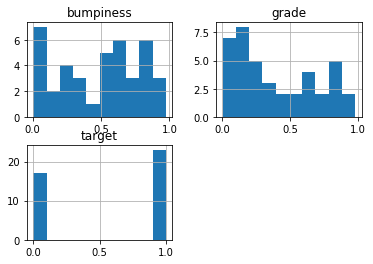

In [14]:
df_train.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1142c79e8>,
      dtype=object)

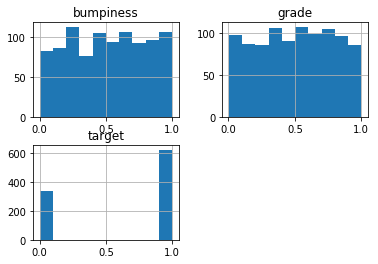

In [15]:
df_test.hist()

In [16]:
# claramente, hay muestras que se ven en el entrenamiento que no se ven en el test

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [19]:
clf = KNeighborsClassifier(n_neighbors=5)

In [20]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

In [21]:
#plt.scatter(y_test, y_predict)
wrong = y_predict != y_test
len(wrong)

200

# Metricas de clasificación
1. Accuracy: %de casos en los que acierto

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_predict, y_test)

0.95

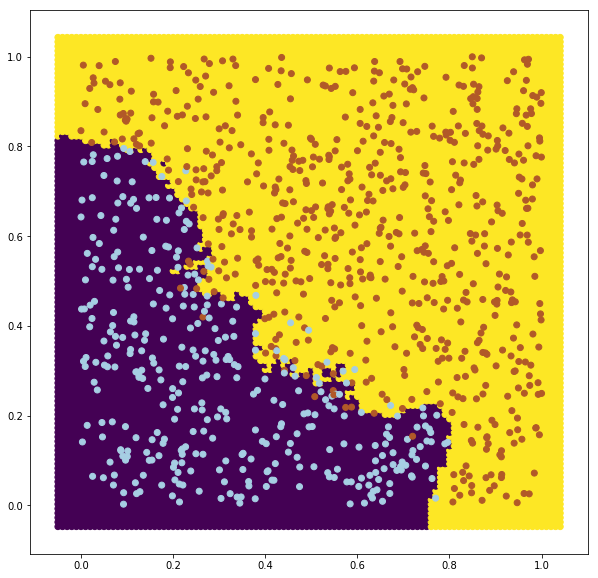

In [24]:
draw(clf, X, y, 0.01)

In [25]:
# Este modelo tiene overfitting. Prueba a ir subiendo el número de vecinos. Cuantos mas vecinos, mejor generaliza y menos overfitting.
# Si le ponemos 500, vemos que el model tiene underfitting.

In [26]:
from sklearn.model_selection import cross_val_score


In [27]:
cross_val_score(clf, X,y,scoring="accuracy", cv=5)
# Coge todos los datos y los divide en 5 cajitas, cogiendo 1 para eval y el resto para test.

array([0.93532338, 0.95024876, 0.935     , 0.93467337, 0.93467337])

In [28]:
mean(cross_val_score(clf, X,y,scoring="accuracy", cv=5))

0.937983774594365

In [29]:
a = []
for i in range (2, 500):
    clf = KNeighborsClassifier(n_neighbors=i)
    a.append(cross_val_score(clf, X,y,scoring="accuracy", cv=5).mean())

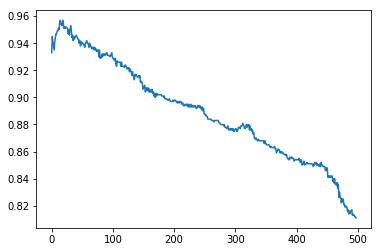

In [30]:
plt.plot(a)

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
clfg = GridSearchCV(KNeighborsClassifier (n_neighbors=1),
                    param_grid={"n_neighbors":range(2,100)},
                   scoring="accuracy",
                   cv=10)

In [33]:
clfg.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(2, 100)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [34]:
clfg.best_params_

{'n_neighbors': 16}

In [35]:
clfg.best_score_

0.958

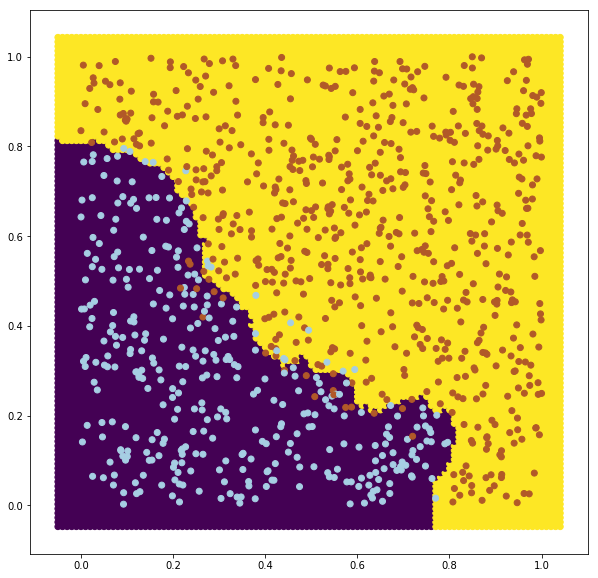

In [36]:
draw(clfg, X,y, 0.01)

Importantísimo.... Tener en cuenta cómo de facil era la predicción de esta clasificación. 
En enfermedades, el 99.9% de la gente está sana !

In [37]:
from sklearn.svm import SVC

In [38]:
clfs = SVC(kernel="linear", C=10)

In [39]:
mean(cross_val_score(clfs, X,y,scoring="accuracy", cv=5))

0.9260284007100177

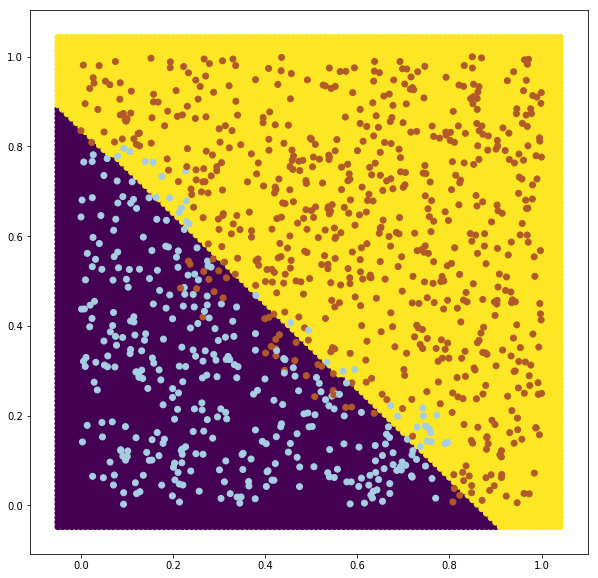

In [40]:
clfs.fit(X,y)
draw(clfs, X,y,0.01)

In [45]:
clfg = GridSearchCV(SVC(kernel="rbf", C=10, gamma=100),
                    param_grid={"C":[5,10,20,30,40,50,60,70], "gamma": [1,5,10,15,20,25,30]},
                   scoring="accuracy",
                   cv=10)

clfg.fit(X,y)

clfg.best_params_

{'C': 20, 'gamma': 30}

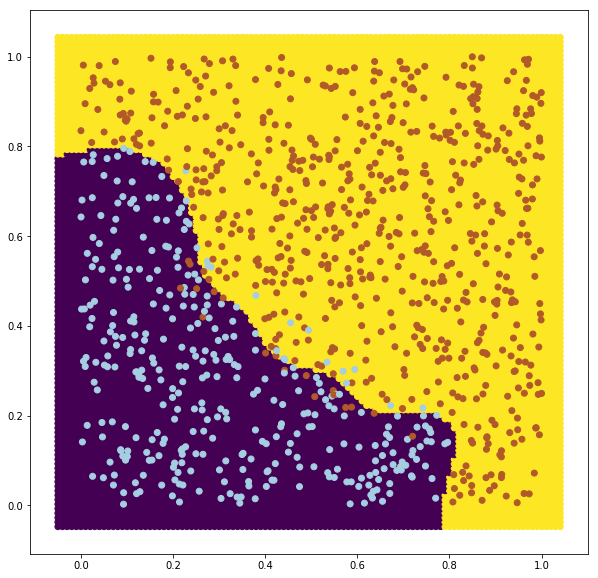

In [46]:
clfg.best_score_

draw(clfg,X,y,0.01)

In [43]:
clfg = GridSearchCV(SVC(kernel="poly", C=10, gamma=100),
                    param_grid={"C":[10,100,1000], "degree": [2,3,4]},
                   scoring="accuracy",
                   cv=10)

clfg.fit(X,y)

clfg.best_params_

KeyboardInterrupt: 

In [ ]:
clfg.best_score_

draw(clfg,X,y,0.01)

In [47]:
clfg.predict(X_test)

array([0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1.])

In [48]:
y_test

521    0.0
737    0.0
740    0.0
660    1.0
411    0.0
678    0.0
626    0.0
513    1.0
859    1.0
136    0.0
811    1.0
76     1.0
636    0.0
973    1.0
938    1.0
899    1.0
280    0.0
883    1.0
761    1.0
319    1.0
549    0.0
174    1.0
371    1.0
527    0.0
210    0.0
235    0.0
101    0.0
986    1.0
902    1.0
947    0.0
      ... 
361    1.0
479    1.0
110    1.0
989    1.0
486    1.0
363    0.0
254    1.0
259    1.0
802    0.0
677    1.0
494    1.0
670    1.0
377    1.0
526    1.0
845    1.0
137    0.0
355    0.0
365    0.0
942    1.0
749    0.0
948    1.0
829    1.0
656    0.0
199    1.0
213    1.0
408    0.0
332    1.0
208    0.0
613    1.0
78     1.0
Name: target, Length: 200, dtype: float64

In [57]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report

In [54]:
confusion_matrix(y_test, clfg.predict(X_test))

array([[ 70,   4],
       [  3, 123]])

filas --> real
columnas --> predict

A1 A2
B1 B2

A1,B1 --> bien etiquetados

En el recall se le da mas importancia a las filas que a las columnas.

In [55]:
precision_score(y_test, clfg.predict(X_test))

0.968503937007874

In [56]:
recall_score(y_test, clfg.predict(X_test))

0.9761904761904762

In [60]:
print(classification_report(y_test, clfg.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.96      0.95      0.95        74
        1.0       0.97      0.98      0.97       126

avg / total       0.96      0.96      0.96       200



del 100% que son ceros, has sido capaz de predecir el 95%

In [61]:
clfg = GridSearchCV(SVC(kernel="linear", C=10, gamma=100),
                    param_grid={"C":[10,100,1000], "degree": [2,3,4]},
                   scoring="precision",
                   cv=10)

clfg.fit(X,y)

clfg.best_params_

{'C': 10, 'degree': 2}

In [64]:
clfg.best_score_

0.9474345061143966

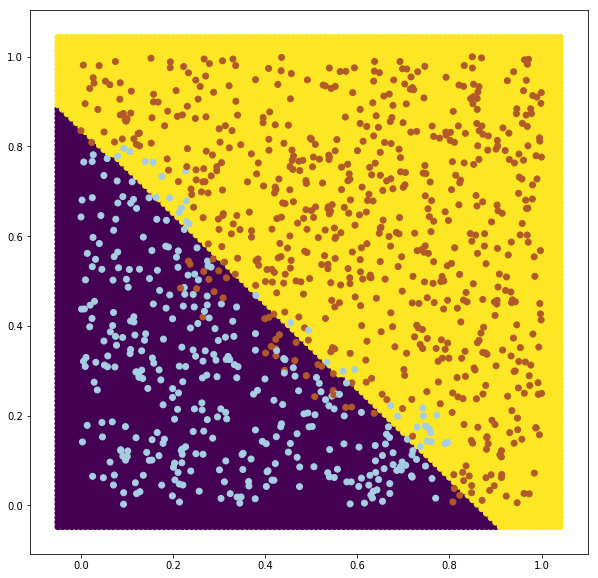

In [63]:
draw(clfg,X,y,0.01)

In [97]:
from sklearn.tree import DecisionTreeClassifier

clfd = DecisionTreeClassifier(max_depth=3)

In [98]:
clfd.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

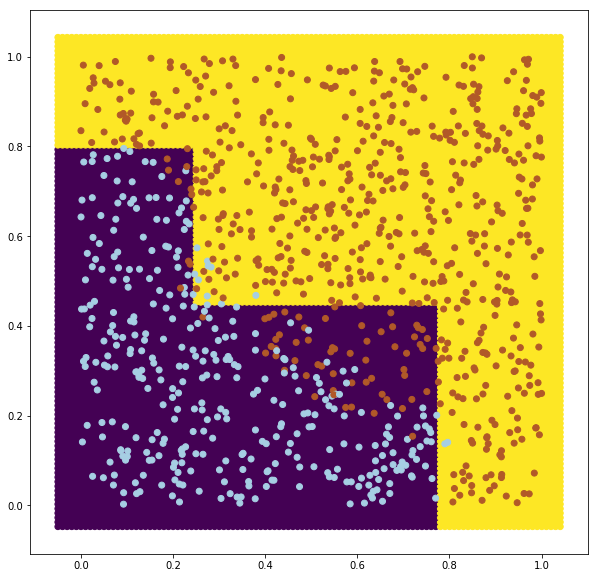

In [99]:
draw(clfd,X,y,0.01)

In [100]:
import pydotplus

In [101]:
#!conda install -y pydotplus

Solving environment: done

## Package Plan ##

  environment location: /anaconda3

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.5.11               |           py36_0         1.0 MB
    certifi-2018.4.16          |           py36_0         142 KB
    ca-certificates-2018.03.07 |                0         124 KB
    openssl-1.0.2o             |       h26aff7b_0         3.4 MB
    ------------------------------------------------------------
                                           Total:         4.7 MB

The following packages will be UPDATED:

    ca-certificates: 2018.03.07-0      anaconda --> 2018.03.07-0     
    certifi:         2018.4.16-py36_0  anaconda --> 2018.4.16-py36_0 
    conda:           4.5.11-py36_0     anaconda --> 4.5.11-py36_0    
    openssl:         1.0.2o-h26aff7b_0 anaconda --> 1.0.2o-h26aff7b_0


conda-4.5.11   

In [102]:
#!conda install -y -c anaconda graphviz

Solving environment: done

## Package Plan ##

  environment location: /anaconda3

  added / updated specs: 
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2018.03.07 |                0         124 KB  anaconda
    openssl-1.0.2o             |       h26aff7b_0         3.4 MB  anaconda
    certifi-2018.4.16          |           py36_0         142 KB  anaconda
    conda-4.5.11               |           py36_0         1.0 MB  anaconda
    ------------------------------------------------------------
                                           Total:         4.7 MB

The following packages will be UPDATED:

    ca-certificates: 2018.03.07-0      --> 2018.03.07-0      anaconda
    certifi:         2018.4.16-py36_0  --> 2018.4.16-py36_0  anaconda
    conda:           4.5.11-py36_0     --> 4.5.11-py36_0     anaconda
    openssl:         1.0.2o-h26aff7b_0 --> 1.0.2

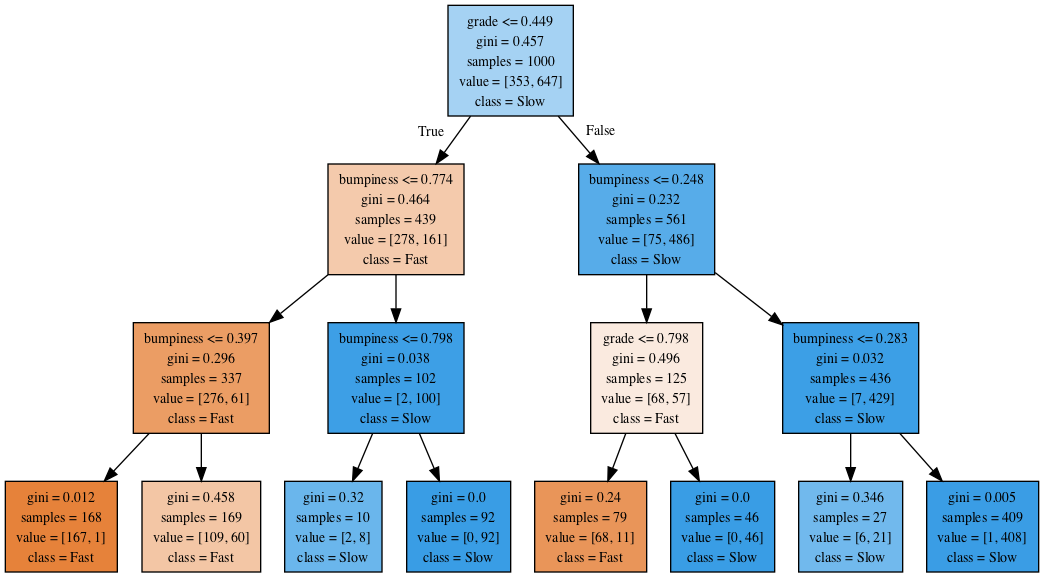

In [105]:
import pydotplus
from IPython.display import Image
from sklearn import tree

dot_data = tree.export_graphviz(clfd,out_file=None, filled=True, feature_names=["bumpiness", "grade"],
                               class_names=["Fast", "Slow"])
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [106]:
X_test

array([[0.34996034, 0.11344861],
       [0.09124241, 0.10989552],
       [0.67013351, 0.15143126],
       [0.5628396 , 0.96668663],
       [0.75113814, 0.14357684],
       [0.20778791, 0.55322293],
       [0.18514984, 0.4396055 ],
       [0.37912622, 0.94882353],
       [0.63374783, 0.89704276],
       [0.06921252, 0.40078434],
       [0.32177735, 0.9350321 ],
       [0.91454759, 0.65091666],
       [0.17944154, 0.3705402 ],
       [0.90938764, 0.11284464],
       [0.83047262, 0.93377556],
       [0.57481193, 0.21841162],
       [0.71761219, 0.06591185],
       [0.80463308, 0.70355704],
       [0.62540874, 0.69331331],
       [0.92988102, 0.77087472],
       [0.07599648, 0.63770002],
       [0.807497  , 0.00772991],
       [0.71943   , 0.45112799],
       [0.19936068, 0.26028977],
       [0.26520306, 0.11402664],
       [0.11988661, 0.1509574 ],
       [0.72072182, 0.12223129],
       [0.94597409, 0.40226535],
       [0.97794448, 0.87313506],
       [0.14075702, 0.38247962],
       [0.

In [107]:
clfd.predict(X_test)

array([0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1.])

In [108]:
clfd.predict_proba(X_test)

array([[0.99404762, 0.00595238],
       [0.99404762, 0.00595238],
       [0.64497041, 0.35502959],
       [0.00244499, 0.99755501],
       [0.64497041, 0.35502959],
       [0.86075949, 0.13924051],
       [0.99404762, 0.00595238],
       [0.00244499, 0.99755501],
       [0.00244499, 0.99755501],
       [0.99404762, 0.00595238],
       [0.00244499, 0.99755501],
       [0.00244499, 0.99755501],
       [0.99404762, 0.00595238],
       [0.        , 1.        ],
       [0.00244499, 0.99755501],
       [0.64497041, 0.35502959],
       [0.64497041, 0.35502959],
       [0.00244499, 0.99755501],
       [0.00244499, 0.99755501],
       [0.00244499, 0.99755501],
       [0.86075949, 0.13924051],
       [0.        , 1.        ],
       [0.00244499, 0.99755501],
       [0.99404762, 0.00595238],
       [0.99404762, 0.00595238],
       [0.99404762, 0.00595238],
       [0.64497041, 0.35502959],
       [0.        , 1.        ],
       [0.00244499, 0.99755501],
       [0.99404762, 0.00595238],
       [0.

In [115]:
clfd = DecisionTreeClassifier(min_samples_leaf=30)
clfd.fit(X,y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

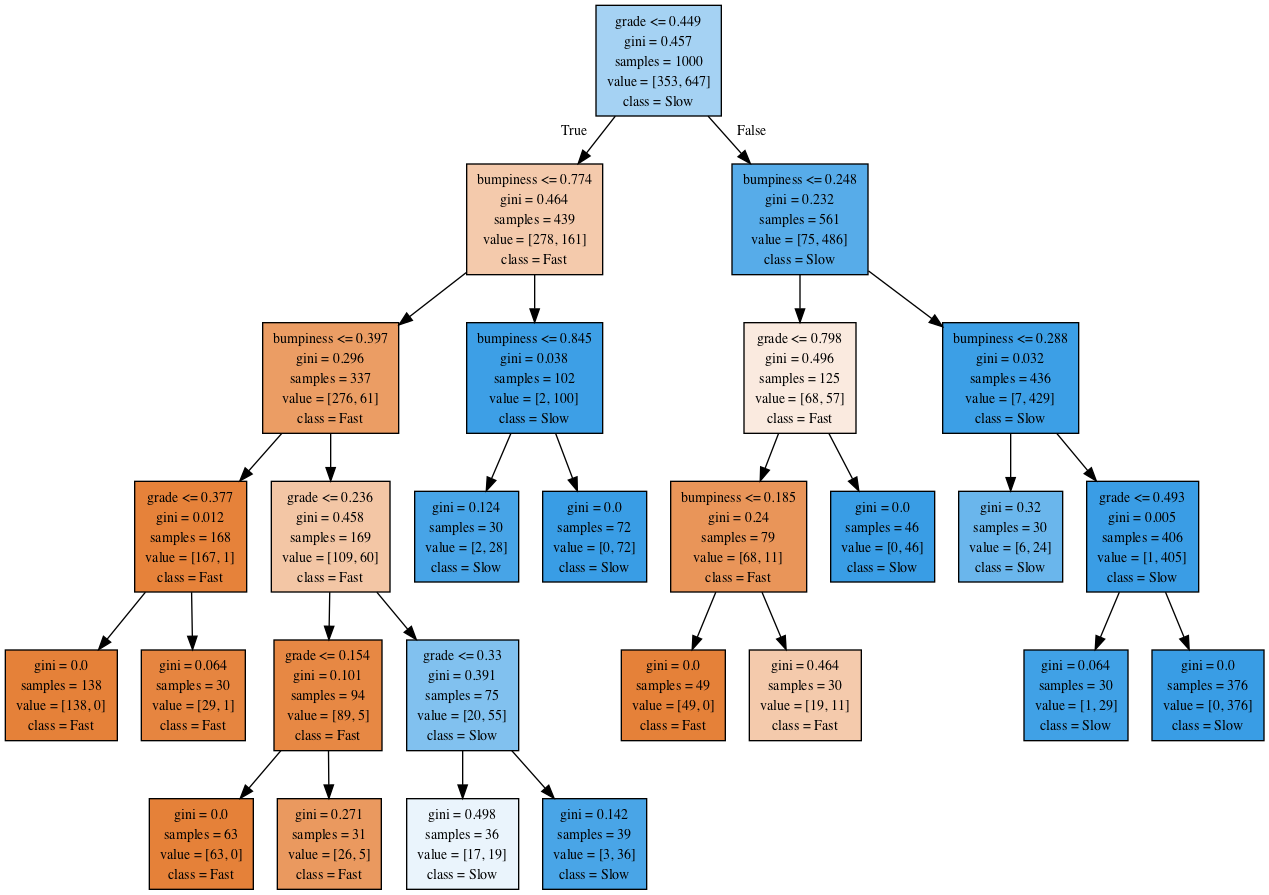

In [116]:
dot_data = tree.export_graphviz(clfd,out_file=None, filled=True, feature_names=["bumpiness", "grade"],
                               class_names=["Fast", "Slow"])
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [117]:
pred = clfd.predict_proba(X_test)

In [121]:
len(pred)

200

In [122]:
len(pred[pred[:,1] > 0.9])

118

In [123]:
threshold = 0.2

In [125]:
len(y_test[ (y_test==1)])

126

In [124]:
len(y_test[ (y_test==1) & (pred[:,1] > threshold)])

124

In [127]:
frr = 1 - (len(y_test[ (y_test==1) & (pred[:,1] > threshold)]) / len(y_test[ (y_test==1)]))

In [128]:
frr

0.015873015873015928

In [129]:
from sklearn.metrics import roc_curve

In [131]:
fp,tp,_ = roc_curve(y_test, pred[:,1])

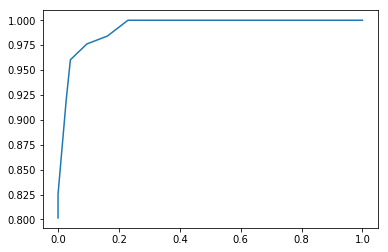

In [132]:
plt.plot(fp,tp)

Lo ideal es que el área debajo de la curva ROC sea lo mas grande posible, poniendo en el scoring "roc_auc" (Area under curve) en el GridSearchCV